# Prédiction de race de chien par réseau de neurones convolutionnel

In [1]:
import zipfile
import os
import glob
import shutil

zip_dir = '/content/'
extract_base_dir = '/content/Races/'

# S'assurer que le dossier d'extraction existe
os.makedirs(extract_base_dir, exist_ok=True)

# Trouver tous les fichiers zip dans zip_dir
zip_files = glob.glob(os.path.join(zip_dir, '*.zip'))

for zip_path in zip_files:
    if os.path.exists(zip_path):
        # Nom du dossier d'extraction : base du zip sans extension, dans Races
        zip_name = os.path.basename(zip_path)[:-4]  # enlever '.zip'
        extract_dir = os.path.join(extract_base_dir, zip_name)

        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)

        print(f'Extraction réussie de {zip_name} dans {extract_dir}')

        # Supprimer le fichier zip après extraction
        os.remove(zip_path)
        print(f'{zip_name}.zip supprimé.')
    else:
        print(f'Fichier introuvable : {zip_path}')

# Réorganisation des dossiers extraits dans /content/Races
top_level_folders = [f for f in os.listdir(extract_base_dir) if os.path.isdir(os.path.join(extract_base_dir, f))]

for folder in top_level_folders:
    parent_folder_path = os.path.join(extract_base_dir, folder)
    inner_folder_path = os.path.join(parent_folder_path, folder)  # dossier avec même nom que parent

    if os.path.exists(inner_folder_path) and os.path.isdir(inner_folder_path):
        # Déplacer tous les fichiers du sous-dossier vers le dossier parent
        for root, dirs, files in os.walk(inner_folder_path):
            for file in files:
                src_path = os.path.join(root, file)
                dst_path = os.path.join(parent_folder_path, file)

                # Remplacer si fichier déjà existant
                if os.path.exists(dst_path):
                    os.remove(dst_path)

                shutil.move(src_path, dst_path)

        # Supprimer le sous-dossier vide
        shutil.rmtree(inner_folder_path)
        print(f'{inner_folder_path} vidé et supprimé.')
    else:
        print(f'Aucun sous-dossier {folder} dans {parent_folder_path}')


Extraction réussie de Pyrenees dans /content/Races/Pyrenees
Pyrenees.zip supprimé.
Extraction réussie de Cairn dans /content/Races/Cairn
Cairn.zip supprimé.
Extraction réussie de Chihuahua dans /content/Races/Chihuahua
Chihuahua.zip supprimé.
Extraction réussie de Samoyed dans /content/Races/Samoyed
Samoyed.zip supprimé.
Extraction réussie de Dingo dans /content/Races/Dingo
Dingo.zip supprimé.
/content/Races/Pyrenees/Pyrenees vidé et supprimé.
/content/Races/Samoyed/Samoyed vidé et supprimé.
/content/Races/Dingo/Dingo vidé et supprimé.
/content/Races/Chihuahua/Chihuahua vidé et supprimé.
/content/Races/Cairn/Cairn vidé et supprimé.


In [2]:
DIR = '/content/Races'
os.listdir(DIR)
os.chdir(DIR)

On remarque avant toute choses, en faisant une exploration sur les données à notre disposition (dans le détails des fichiers) que les images n'ont pas toutes les mêmes dimensions. De plus parfois ce n'est pas le chien qui est au premier plan de l'image/centré.
On va donc d'abord parcourir l'ensemble des images et faire un resize sur la plus petite taille d'image.
Nous aurons alors quelques dimensions pour les entrées de notre CNN.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread

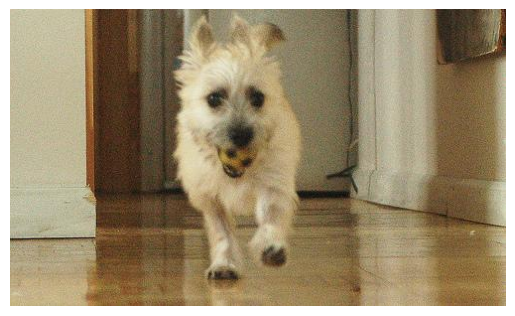

In [4]:
X = []
Y = []
for race in os.listdir():
  for photo in os.listdir(race):
    sample_image = imread(race + "/" + photo).astype("float32") / 255
    X.append(sample_image)
    Y.append(race)
plt.imshow(sample_image)
plt.axis("off")
plt.show()

In [5]:
races = os.listdir()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=17112020)

In [7]:
X_train[0]

array([[[0.64705884, 0.6509804 , 0.627451  ],
        [0.6392157 , 0.6431373 , 0.61960787],
        [0.6313726 , 0.63529414, 0.6117647 ],
        ...,
        [0.50980395, 0.5176471 , 0.5137255 ],
        [0.50980395, 0.5176471 , 0.5137255 ],
        [0.50980395, 0.5176471 , 0.5137255 ]],

       [[0.64705884, 0.6509804 , 0.627451  ],
        [0.6392157 , 0.6431373 , 0.61960787],
        [0.6313726 , 0.63529414, 0.6117647 ],
        ...,
        [0.54509807, 0.5529412 , 0.54901963],
        [0.5411765 , 0.54901963, 0.54509807],
        [0.5372549 , 0.54509807, 0.5411765 ]],

       [[0.64705884, 0.6509804 , 0.627451  ],
        [0.6392157 , 0.6431373 , 0.61960787],
        [0.6313726 , 0.63529414, 0.6117647 ],
        ...,
        [0.5647059 , 0.5686275 , 0.5764706 ],
        [0.5529412 , 0.5568628 , 0.5647059 ],
        [0.54509807, 0.54901963, 0.5568628 ]],

       ...,

       [[0.61960787, 0.6117647 , 0.5529412 ],
        [0.61960787, 0.6117647 , 0.5529412 ],
        [0.62352943, 0

In [8]:
[len(Y_train),len(Y)]

[702, 936]

In [9]:
width=10000
height=10000
for image in X:
  width = min(width,image.shape[0])
  height = min(height,image.shape[1])

In [10]:
[width,height]

[124, 133]

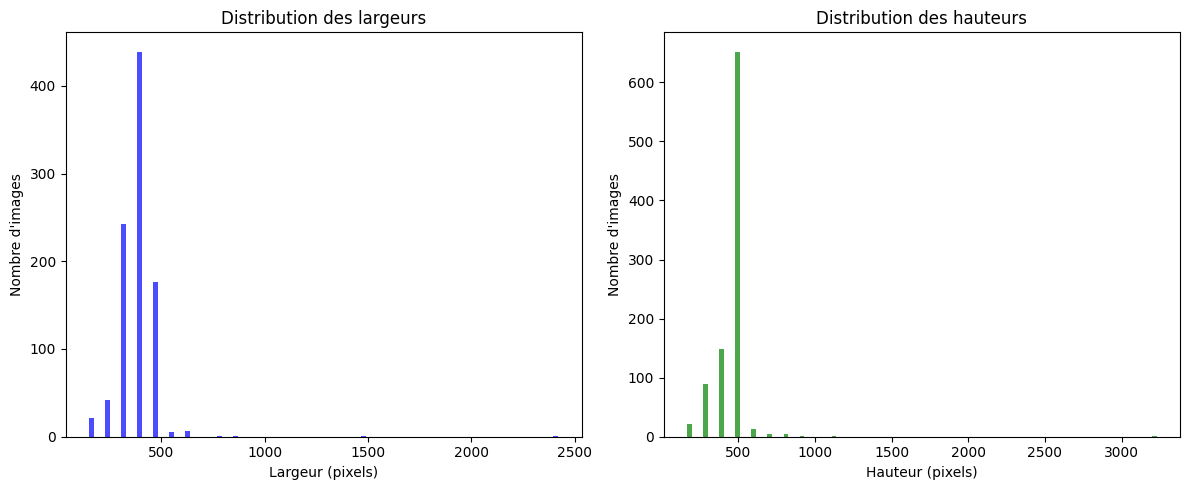

In [11]:
# Extraire les dimensions
widths = [image.shape[0] for image in X]
heights = [image.shape[1] for image in X]

# Créer une figure avec 2 sous-graphiques côte à côte
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogramme pour les largeurs
ax1.hist(widths, bins=30, color='blue', alpha=0.7, rwidth=0.3)
ax1.set_title("Distribution des largeurs")
ax1.set_xlabel("Largeur (pixels)")
ax1.set_ylabel("Nombre d'images")

# Histogramme pour les hauteurs
ax2.hist(heights, bins=30, color='green', alpha=0.7, rwidth=0.3)
ax2.set_title("Distribution des hauteurs")
ax2.set_xlabel("Hauteur (pixels)")
ax2.set_ylabel("Nombre d'images")

plt.tight_layout()
plt.show()

In [12]:
 [f"Moyenne des largeurs : {np.mean(widths):.2f}", f"Moyenne des hauteurs : {np.mean(heights):.2f}"]

['Moyenne des largeurs : 382.77', 'Moyenne des hauteurs : 463.64']

In [13]:
[f"Median des largeurs : {np.median(widths):.2f}", f"Median des hauteurs : {np.median(heights):.2f}"]

['Median des largeurs : 375.00', 'Median des hauteurs : 500.00']

On va choisir la valeur médiane pour notre resize, de ce fait on aura une image qui ressemble sachant qu'il y a peu de valeurs extrémement grandes (ou extremement petites), cela parait plus cohérent que la moyenne.

In [14]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from keras import layers
from keras import models

## Premier modèle (modèle "from scratch")

In [15]:
tf.random.set_seed(17112020) #On fixe la graine pour intérpréter les résultats

model = models.Sequential()

model.add(layers.Conv2D(32,(3, 3),activation="relu", input_shape=(375,500,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 373, 498, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 186, 249, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 184, 247, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 92, 123, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 90, 121, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 45, 60, 128)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,248 (364.25 KB)

 Trainable params: 93,248 (364.25 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 373, 498, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 186, 249, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 184, 247, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 92, 123, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 90, 121, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 45, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 345600)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    22,118,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,212,037 (84.73 MB)

 Trainable params: 22,212,037 (84.73 MB)

 Non-trainable params: 0 (0.00 B)

On prépare les données pour l'apprentissage et la validation.

In [19]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
Y_train_reshaped = np.array(Y_train).reshape(-1, 1)
Y_train_encoded = encoder.fit_transform(Y_train_reshaped)

In [20]:
X_train_resized = []
for img in X_train:
    resized_img = tf.image.resize(img, (375, 500)).numpy()
    X_train_resized.append(resized_img)

X_train = np.array(X_train_resized)
optim = "adam"
model.compile(optimizer=optim,loss="categorical_crossentropy",metrics=["accuracy"])
history_m = model.fit(X_train,Y_train_encoded,batch_size=32,epochs=20)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 646ms/step - accuracy: 0.2309 - loss: 4.3788
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - accuracy: 0.2187 - loss: 1.6594
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - accuracy: 0.3158 - loss: 1.5744
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.3890 - loss: 1.4566
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step - accuracy: 0.3873 - loss: 1.4780
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - accuracy: 0.5443 - loss: 1.1729
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step - accuracy: 0.7707 - loss: 0.6472
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.9136 - loss: 0.3316
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.9478 - loss: 0.2733
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 165ms/step - accuracy: 0.9576 - loss: 0.2304
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.9760 - loss: 0.1266
Epoch 12/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/ste

In [21]:
Y_test_reshaped = np.array(Y_test).reshape(-1, 1)
Y_test_encoded = encoder.fit_transform(Y_test_reshaped)
X_test_resized = []
for img in X_test:
    resized_img = tf.image.resize(img, (375, 500)).numpy()
    X_test_resized.append(resized_img)

X_test = np.array(X_test_resized)
model.evaluate(X_test,Y_test_encoded)

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 344ms/step - accuracy: 0.2533 - loss: 7.3352


[7.242249965667725, 0.252136766910553]

On remarque que sur l'apprentissage on a une accuracy de 100% avec une loss très faible toutefois lorsqu'on vérifie l'accuracy sur les données de test est plus faible (ce n'est pas très satisfaisant). On repère donc ici un surapprentissage du modèle.

In [22]:
model.save(DIR+"model_race_base_no_aug.keras") #Pour sauvegarde du modèle

Notre premier modèle et relativement satisfaisant (pour un modèle from scratch), (plus de 30% d'accuracy) on va maintenant comparer ce modèle à un modèle qui aurait été entrainé avec de la data augmentation.

In [23]:
#Code généré par une intelligence artificielle

from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        fill_mode='nearest'
    ) #On remarque que chaque option défini les transformations possibles sur Nos images
      # originales (rotation, translation, Shear (cisaillement), zoom, effet miroir)

On va ensuite recréer un nouveau modèle (exactement le même que précédemment mais qui sera entrainé lui avec la data augmentation).

In [24]:
model_data_aug = models.Sequential()

model_data_aug.add(layers.Conv2D(32,(3, 3),activation="relu", input_shape=(375,500,3)))
model_data_aug.add(layers.MaxPooling2D((2, 2)))
model_data_aug.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_data_aug.add(layers.MaxPooling2D((2, 2)))
model_data_aug.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_data_aug.add(layers.MaxPooling2D((2, 2)))
model_data_aug.add(layers.Flatten())
model_data_aug.add(layers.Dense(64, activation='relu'))
model_data_aug.add(layers.Dense(5, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
train_generator = datagen.flow(X_train, Y_train_encoded, batch_size = 32)
model_data_aug.compile(optimizer=optim,loss="categorical_crossentropy",metrics=["accuracy"])
history_m_data_augmented = model_data_aug.fit(train_generator, epochs = 20)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.2101 - loss: 3.9743
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.2516 - loss: 1.6039
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.2354 - loss: 1.6004
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.2643 - loss: 1.5755
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.3299 - loss: 1.5358
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.3001 - loss: 1.5034
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.3659 - loss: 1.4827
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.3209 - loss: 1.5200
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.3451 - loss: 1.5180
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.3591 - loss: 1.4376
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.3369 - loss: 1.4533
Epoch 12/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.3289 - lo

In [26]:
model_data_aug.evaluate(X_test,Y_test_encoded)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.4774 - loss: 1.2793


[1.3158389329910278, 0.43589743971824646]

In [27]:
model_data_aug.save(DIR+"model_race_base_aug.keras")

Ce dernier modèle est plus précis (meilleur accuracy et loss plus faible). On voit que la data augmentation a amélioré le modèle. C'est normal car si on regarde les images que l'on a dans le jeu de données elles sont très variées. On a également réduit le surapprentissage (c'est normal on a virtuellement augmenté la taille du jeu de données d'apprentissage).

## Second type de modèle, avec un modèle de base (Transfer Learning)

A l'aide d'un petit prompt à l'intelligence artificielle, je me suis documenté sur les modèles pré entrainés. VGG16 et VGG19 seraient de gros modèles assez ancien, il me suggère MobileNetV2, j'ai réalisé quelques tentatives avec ce modèle et il semblerait que le mieux ne soit pas de faire une couche flatten (perte d'information sur la position) mais plutôt une couche d'average pooling juste après le modèle de base. (C'est d'ailleurs ce qui est utilisé dans le modèle de base si on met include_top sur True)

In [28]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(375,500,3))
base_model.trainable = False

base_model.summary()
#Signifie on ne va entrainer que les dix derniers layers du model convolutionnel

/tmp/ipython-input-28-3570624834.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(375,500,3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 375, 500,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 188, 250,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 188, 250,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 188, 250,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 188, 250,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 188, 250,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 188, 250,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 188, 250,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 188, 250,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 188, 250,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 188, 250,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 188, 250,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 189, 251,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 94, 125,   │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 94, 125,   │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 94, 125,   │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 94, 125,   │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [29]:
model_transf = models.Sequential()
model_transf.add(base_model)
model_transf.add(layers.GlobalAveragePooling2D())
model_transf.add(layers.Dense(256, activation='relu'))
model_transf.add(layers.Dense(5, activation='softmax'))

model_transf.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 12, 16, 1280)   │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,587,205 (9.87 MB)

 Trainable params: 329,221 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [30]:
from tensorflow.keras.optimizers import RMSprop
optim = RMSprop(learning_rate=0.001)

model_transf.compile(optimizer = optim,
                     loss="categorical_crossentropy",
                     metrics=["accuracy"])
history_m_transf = model_transf.fit(X_train,Y_train_encoded,batch_size=16,epochs=20)

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 18s 173ms/step - accuracy: 0.6429 - loss: 0.9102
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9691 - loss: 0.1143
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9784 - loss: 0.0736
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9879 - loss: 0.0371
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9984 - loss: 0.0089
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9927 - loss: 0.0215
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 1.0000 - loss: 0.0037
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 1.0000 - loss: 0.0012
Epoch 9/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 1.0000 - loss: 7.1017e-04
Epoch 10/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 1.0000 - loss: 4.3359e-04
Epoch 11/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 1.0000 - loss: 3.0339e-04
Epoch 12/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/st

In [31]:
model_transf.evaluate(X_test, Y_test_encoded)

8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 701ms/step - accuracy: 0.9392 - loss: 0.2154


[0.19470514357089996, 0.9529914259910583]

L'accuracy très élevée en entrainement pourrait laisser penser à un surapprentissage mais en réalité le score en test est également très bon. Ce modèle a su capter toutes les spécificités des races de chiens et le modèle de base a de très bon poids et un très bonne structure pour ce jeu de données.

In [32]:
model_transf.save(DIR+"model_race_transf_no_aug.keras")

In [33]:
model_transf_data_aug = models.Sequential()
model_transf_data_aug.add(base_model)
model_transf_data_aug.add(layers.GlobalAveragePooling2D())
model_transf_data_aug.add(layers.Dense(256, activation='relu'))
model_transf_data_aug.add(layers.Dense(5, activation='softmax'))

In [34]:
from tensorflow.keras.optimizers import RMSprop
optim = RMSprop(learning_rate=0.001)

train_generator = datagen.flow(X_train, Y_train_encoded, batch_size = 32)
model_transf_data_aug.compile(optimizer=optim,loss="categorical_crossentropy",metrics=["accuracy"])
history_m_transf_data_augmented = model_transf_data_aug.fit(train_generator,
                                              epochs = 10)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5844 - loss: 1.2774
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9052 - loss: 0.3181
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9009 - loss: 0.2485
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9316 - loss: 0.2092
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9437 - loss: 0.1601
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9678 - loss: 0.1023
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9526 - loss: 0.1372
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9525 - loss: 0.1223
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9678 - loss: 0.0935
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9492 - loss: 0.1285


In [35]:
model_transf_data_aug.evaluate(X_test,Y_test_encoded)

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 314ms/step - accuracy: 0.9334 - loss: 0.1534


[0.12559060752391815, 0.9529914259910583]

On voit que la data augmentation n'apporte pas grand chose, le modèle est déjà très bon donc difficile de faire mieux. toutefois on notera que l'accuracy est similaire et la loss plus faible. On a également un risque amoindri de surapprentissage par data augmentation, comme vu précédemment.

In [36]:
model_transf_data_aug.save(DIR+"model_race_transf_aug.keras")

In [37]:
import gc
gc.collect()

2429

In [38]:
from tensorflow.keras.optimizers import Adam

# Charger le 2éme modèle de base (pré-entraîné)
base_model1 = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(375,500,3))


# Congeler toutes les couches du modèle de base
base_model1.trainable = False


# Créer le modèle en ajoutant de nouvelles couches
model_transf1 = models.Sequential([
    base_model1,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

model_transf1.summary()

# Compiler le modèle pour l'entraînement initial
model_transf1.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

train_generator = datagen.flow(X_train, Y_train_encoded, batch_size = 32)

# Entraîner le modèle avec augmentation des données
history_model_transf1 = model_transf1.fit(
    train_generator,
    epochs=20
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 12, 16, 2048)   │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │         5,125 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,691,013 (98.00 MB)

 Trainable params: 2,103,301 (8.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.1873 - loss: 3.9772
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.1883 - loss: 2.1957
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.2217 - loss: 1.7374
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.2316 - loss: 1.6401
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.2156 - loss: 1.6130
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.1951 - loss: 1.6035
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.2214 - loss: 1.5947
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.2414 - loss: 1.6026
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.2321 - loss: 1.6066
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.2546 - loss: 1.5907
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.2047 - loss: 1.5949
Epoch 12/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.2392 - lo

In [39]:
model_transf1.evaluate(X_test, Y_test_encoded)

8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.2147 - loss: 1.5919


[1.6080818176269531, 0.21367521584033966]

Le modèle ne semble pas converger, faible accuracy, loss qui stagne. On ne va pas le retenir il relève davantage de l'aléatoire qu'autre chose.

## Fine-Tuning du modèle

In [40]:
# Après l'entraînement initial, déverrouiller les dernières couches du modèle de base pour le fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-4]:
    layer.trainable = False

model_transf_fine_tune = model_transf
# Recompiler le modèle pour le fine-tuning avec un faible taux d'apprentissage
model_transf_fine_tune.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Continuer l'entraînement avec fine-tuning
history_fine_tuning = model_transf_fine_tune.fit(
    train_generator,
    epochs=20
)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.9568 - loss: 0.2040
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9520 - loss: 0.2243
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9708 - loss: 0.1309
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9764 - loss: 0.0804
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9572 - loss: 0.1302
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9764 - loss: 0.0908
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9756 - loss: 0.1173
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9715 - loss: 0.1041
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9639 - loss: 0.2076
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9841 - loss: 0.0768
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9772 - loss: 0.1014
Epoch 12/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9840 - lo

In [41]:
model_transf_fine_tune.evaluate(X_test, Y_test_encoded)

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 299ms/step - accuracy: 0.9466 - loss: 0.1894


[0.17689621448516846, 0.9572649598121643]

Le fine tuning n'apporte pas non plus grand chose à ce modèle déjà très bon (voir même le fait de modifier les poids d'origine peut empirer le modèle, a voir si on choisit certaines couches ou non.) Le problème ici c'est que le modèle peut avoir appris sur des images semblable on peut donc difficilement améliorer le modèle.

In [42]:
# Après l'entraînement initial, déverrouiller les dernières couches du modèle de base pour le fine-tuning
base_model1.trainable = True
for layer in base_model1.layers[:-4]:
    layer.trainable = False

# Recompiler le modèle pour le fine-tuning avec un faible taux d'apprentissage
model_transf1.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Continuer l'entraînement avec fine-tuning
history_fine_tuning = model_transf1.fit(
    train_generator,
    epochs=20
)

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.2204 - loss: 1.6223
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.2302 - loss: 1.5986
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.2673 - loss: 1.5790
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.2650 - loss: 1.5901
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.2466 - loss: 1.5776
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.2464 - loss: 1.5893
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.2666 - loss: 1.5672
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.2868 - loss: 1.5601
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.2735 - loss: 1.5687
Epoch 10/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.2417 - loss: 1.5888
Epoch 11/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.2658 - loss: 1.5622
Epoch 12/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.2726 - lo

In [43]:
model_transf1.evaluate(X_test, Y_test_encoded)

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 459ms/step - accuracy: 0.3388 - loss: 1.5691


[1.5461010932922363, 0.3333333432674408]

Ce modèle était plutôt aléatoire (probablement à cause de la structure du modèle de base) on voit qu'il y a une petite amélioration de l'accuracy, cependant il n'y a toujours pas de convergence satisfaisante, c'est dommage pour un modèle qui a déjà des poids qui ont appris sur un jeu de données différent du notre. Rappel de la structure :

In [44]:
base_model1.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 375, 500,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 381, 506,  │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 188, 250,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 188, 250,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 188, 250,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 190, 252,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 94, 125,   │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 94, 125,   │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 94, 125,   │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 94, 125,   │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 94, 125,   │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 94, 125,   │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 94, 125,   │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 94, 125,   │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 94, 125,   │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 94, 125,   │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 94, 125,   │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 1,054,720 (4.02 MB)

 Non-trainable params: 22,532,992 (85.96 MB)

# Meilleur modèle
On choisit de conserver le meilleur modèle (MobileNetV2 sans data augmentation) et on va mettre en place un code qui utilise le modèle pour prédire la race du chien.

In [45]:
from sklearn.metrics import f1_score

def f1_score_custom(y_true, y_pred):
    y_true = np.argmax(y_true, axis=1)
    y_pred = np.argmax(y_pred, axis=1)
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"F1 Score: {f1}")

print("Modèle from scratch :")
f1_score_custom(Y_test_encoded, model.predict(X_test))
print("Modèle from scratch data augmenté :")
f1_score_custom(Y_test_encoded, model_data_aug.predict(X_test))
print("Modèle transfer learning avec modèle de base MobileNetV2 :")
f1_score_custom(Y_test_encoded, model_transf.predict(X_test))
print("Modèle transfer learning data augmenté avec modèle de base MobileNetV2 :")
f1_score_custom(Y_test_encoded, model_transf_data_aug.predict(X_test))
print("Modèle transfer learning fine tuning avec modèle de base MobileNetV2 :")
f1_score_custom(Y_test_encoded, model_transf_fine_tune.predict(X_test))
print("Modèle transfer learning fine tuning avec modèle de base ResNet50 :")
f1_score_custom(Y_test_encoded, model_transf1.predict(X_test))

Modèle from scratch :
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step
F1 Score: 0.2533048979444786
Modèle from scratch data augmenté :
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step
F1 Score: 0.44000324881031805
Modèle transfer learning avec modèle de base MobileNetV2 :


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 504ms/step
F1 Score: 0.9572338143188345
Modèle transfer learning data augmenté avec modèle de base MobileNetV2 :


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 502ms/step
F1 Score: 0.9571801888079361
Modèle transfer learning fine tuning avec modèle de base MobileNetV2 :
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step 
F1 Score: 0.9572338143188345
Modèle transfer learning fine tuning avec modèle de base ResNet50 :
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 787ms/step
F1 Score: 0.3010853248214123


D'après les F1-score, les 3 modèles basés sur MobileNetV2 sont équivalents, on va donc choisir le plus simple a entrainer, le premier sans data augmentation ni fine tuning.

In [46]:
img_choisie = np.random.randint(0,233) #234 images dans test

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


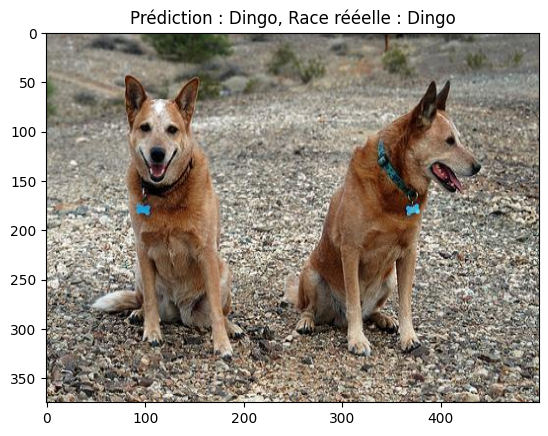

In [47]:
predictions = model_transf.predict(X_test)

predicted_class = np.argmax(predictions[img_choisie])
true_class = np.argmax(Y_test_encoded[img_choisie])
plt.imshow(X_test[img_choisie])
plt.title(f"Prédiction : {encoder.categories_[0][predicted_class]}, Race rééelle : {encoder.categories_[0][true_class]}")
plt.show()

Les courbes d'apprentissage :

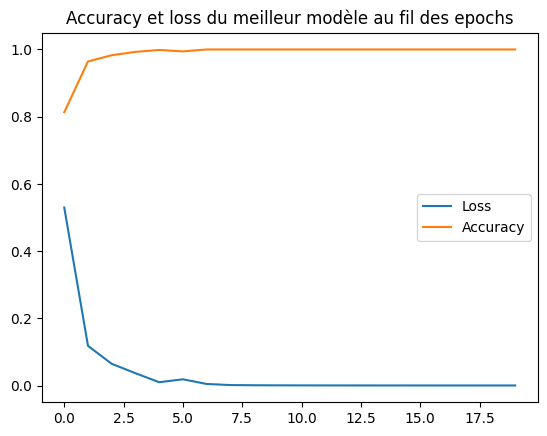

In [48]:
plt.plot(history_m_transf.history["loss"], label = "Loss")
plt.plot(history_m_transf.history["accuracy"],label = "Accuracy")
plt.title("Accuracy et loss du meilleur modèle au fil des epochs")
plt.legend()
plt.show()

On remarque un apprentissage très rapide et très bon sur les données d'entrainement, de plus le modèle est fiable sur les données de validation comme nous avons pu le voir précédemment.

Ce résultat nous démontre également que les poids d'apprentissage d'origine du modèle de base sont bons et on été potentiellement entrainées sur des données similaires.